# Testing the Neural Network

Import libraries required to test the neural network built

In [1]:
import numpy as np
import main
import random as rd

In this case, we are testing the init_layers function. We are checking if the shape of the weight matrices is correct. If the test passes, we print "All tests pass".
First we try a test case to see if the function is working correctly.

In [58]:
from main import init_layers

def test_init_layers():
    W, b = init_layers(3, [3, 2, 2])
    print(b)
    assert W[0].shape == (2, 3)
    assert W[1].shape == (2, 2)
    assert b[0].shape == (3, 1)
    assert b[1].shape == (2, 1)
    assert b[2].shape == (2, 1)

    print("All tests pass")
    print(W)
    
test_init_layers()

[array([[0.],
       [0.],
       [0.]]), array([[0.],
       [0.]]), array([[0.],
       [0.]])]
All tests pass
[array([[ 0.27800829, -0.08620022,  1.02676787],
       [-0.31760876, -0.68542432,  0.92460607]]), array([[ 0.04892919,  0.81674073],
       [-0.34736963,  0.80621893]])]


Here it works as expected.
Let's generalize the test case to check if the function is working correctly for all cases.

In [57]:
import random
from main import init_layers

L = random.randint(1, 10)
dims = [random.randint(1, 10) for _ in range(L)]

def test_init_layers_shape():
    W, b = init_layers(L, dims)
    for i in range(L - 1):
        assert W[i].shape == (dims[i + 1], dims[i])
        assert b[i].shape == (dims[i], 1)
    print("All tests pass")

test_init_layers_shape()

def test_init_layers_mean_var():
    mean = []
    W, b = init_layers(L, dims)
    for i in range(L - 1):
        mean.append(np.mean(W[i]))
    assert np.mean(np.abs(mean) - 1) < 0.1 # mean is close to 0 and variance is close to 1
    print("All tests pass")

test_init_layers_mean_var()

All tests pass
All tests pass


The function is working correctly for all cases - random number of layers and random number of neurons in each layer.

Now we can test the feedforward function. We will test the function with a simple test case to see if it is working correctly.

In [4]:
from main import feed_forward, sigmoid

def test_forward_propagation():

    W = [np.array([[1.], [2.]]), np.array([[1., 2.]])]
    b = [np.array([[0]]), np.array([[1.], [2.]]), np.array([[3.]])]

    L=3
    # n = [1, 2, 1] number of neurons
    X = np.array([[1.]])
    
    A, Z, y_hat = feed_forward(L, X, W, b)

    assert len(Z) == len(A)
    assert len(A) == L

    # We calculated by hand the expected results, to check if we obtain the matching values

    assert Z[1][0] == 2
    assert A[1][0] == sigmoid(Z[1][0])

    assert Z[1][1] == 4
    assert A[1][1] == sigmoid(Z[1][1])
    
    assert Z[2] == W[1] @ A[1] + b[2]
    assert sigmoid(Z[2]) == y_hat

    """ print("------------------")
    print(W[1] @ A[1] + b[1])
    print(Z[2])
    print("------------------") """
    print("All tests pass")
    
test_forward_propagation()

Assertion going on
Assertation value ok
(2, 1)
(1, 1)
[[1.]]
(1, 2)
(2, 1)
[[0.88079708]
 [0.98201379]]
All tests pass


This use case does work as expected.
Let's now generalize the test to check if the feed forward function works well for any layer and number of neurons per layer.

Then, we'll generalize the test once again to test the robustness of the function based on the dimension of the input matrix X

In [5]:
import random as rd
from main import feed_forward

def test_forward_propagation_n():

    # Limited to 10 layers - 10 layers probably won't ever be need in our case and we don't have infinite calculation power
    L = rd.randint(3, 10)

    dims = []
    for i in range(L):
        dims.append(rd.randint(1, 5))


    # dims = [rd.randint(1, 10) for _ in range(L)] learn generators

    W, b = init_layers(L, dims)
    assert len(W) + 1 == len(b)

    # number of lines of input matrix = n
    # number of columns = 1 for now - robustness test afterwards
    n1 = dims[0]

    # Need to learn the use of generators
    X_list = []
    for i in range(n1):
        X_list.append([rd.randint(1, 200)])

    X = np.array(X_list)

    print("X:", X)

    A, Z, y_hat = feed_forward(L, X, W, b)

    assert len(Z) == len(A)
    assert len(A) == L
    
    for i in range(1, L):
        assert np.array_equal(Z[i], W[i-1] @ A[i-1] + b[i])     
        assert np.array_equal(A[i], sigmoid(Z[i]))

    i = rd.randint(1, L)
    # The values below are the same. As expected.
    # print(W[i-1])
    # print(A[i-1])
    # print(b[i])
    # print(W[i-1] @ A[i-1] + b[i])
    # print("------------")
    # print(Z[i])                     # After calculating by hand, we can see this value is true
    # print("------------")
    # print("------------")
    print(A)
    print(y_hat)
    

    print("------------------")
    print("All tests pass")

test_forward_propagation_n()

Expected number of features:  5
X: [[134]
 [152]
 [ 39]
 [200]
 [  4]]
Assertion going on


AssertionError: Expected shape of X: number of samples in line, number of features in column

The function is working correctly for all cases - random number of layers and random number of neurons in each layer.

Now we can test the backpropagation function. We will test the function with a simple test case to see if it is working correctly.

In [1]:
import main
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Initialize layers
nb_layers = 3
dims = [2, 1, 1]
W, b = main.init_layers(nb_layers, dims)

# Input and target
X = np.array([[1, 2]])
y = np.array([[1, 0]])

print("X:", X)
print(X.shape)


X: [[1 2]]
(1, 2)


Number of features in entry data:  2
[0.27092085905515073, 0.2661013578826148, 0.2614205465546562, 0.25687329283946037, 0.2524546833209169, 0.24816001355986564, 0.2439847786650041, 0.23992466426380266, 0.23597553786283057, 0.23213344058614482, 0.22839457927986503, 0.22475531897066883, 0.22121217566572204, 0.2177618094814298, 0.21440101808839537, 0.2111267304600374, 0.20793600091246645, 0.20482600342341992, 0.20179402621830808, 0.19883746661170557, 0.19595382609294348, 0.19314070564479624, 0.19039580128460828, 0.18771689981757908, 0.18510187479229095, 0.1825486826489456, 0.18005535905114953, 0.17762001539246294, 0.17524083546929525, 0.17291607231209213, 0.17064404516711623, 0.16842313662146563, 0.16625178986431588, 0.16412850607768803, 0.1620518419503679, 0.16002040730890274, 0.1580328628598894, 0.1560879180380541, 0.15418432895488882, 0.1523208964428726, 0.15049646419054086, 0.14870991696392005, 0.1469601789100495, 0.14524621193854292, 0.14356701417733747, 0.14192161849897858, 0.140309

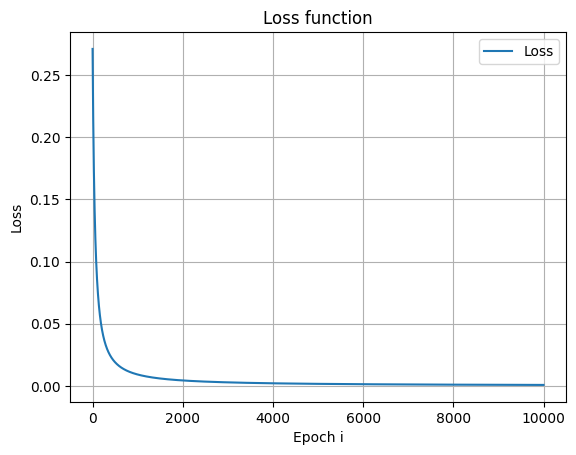

In [24]:
# Overfitting test 
from main import train_nn
from main import sigmoid, sigmoid_derivative
from main import binary_cross_entropy, binary_cross_entropy_derivative, mean_squared_error, mean_squared_error_derivative

X = np.array([[1, 2]])
y = np.array([1])

print("Number of features in entry data: ", len(X[0]))

# Train the model
epochs, losses = main.train_nn(4, X, y, [2, 2, 2, 1], 0.1, 10000, g=sigmoid, gder=sigmoid_derivative, loss=binary_cross_entropy, lossder=binary_cross_entropy_derivative)

print(losses)
print(epochs)
print(losses[-1])

# Plot the losses
plt.plot(epochs, losses, label="Loss")
plt.xlabel("Epoch i")
plt.ylabel("Loss")
plt.title("Loss function")
plt.legend()
plt.grid()
plt.savefig("./images/loss_one_sample.png")
plt.show()

Let's now generalize the test to check if the backpropagation function works well for a bigger dataset.

In [12]:
import main

L = 4
nb_neurons = [2, 2, 2, 1]
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y = np.array([1, 0, 1, 0])

print("Number of features in entry data: ", len(X[0]))
print("Number of samples in entry data: ", len(X))


# Train the model
W, b = main.init_layers(L, nb_neurons)
A, Z, y_hat = main.feed_forward(L, X, W, b)

print(y_hat)

Number of features in entry data:  2
Number of samples in entry data:  4
[[0.24918909 0.26060965 0.26644153 0.26912337]]


Number of features in entry data:  2
[1.3646391843745158, 1.0377260530296515, 0.8563160054344114, 0.7428552514341246, 0.6712151234936995, 0.6252017276901559, 0.5949915547243576, 0.5747016505846165, 0.5607794360701115, 0.5510378030824832, 0.5440987068621045, 0.5390732664454099, 0.5353752946545711, 0.5326103142671891, 0.5305079516988661, 0.5288797843137673, 0.5275924642331875, 0.5265502171116158, 0.5256832160156822, 0.524939707268602, 0.5242805707590241, 0.5236754777639803, 0.5231001004075622, 0.5225340044032595, 0.5219589635970029, 0.5213574949723878, 0.5207114386116916, 0.5200004033819104, 0.519199865144005, 0.5182786367820716, 0.5171953317459731, 0.5158933596509716, 0.5142941287986509, 0.5122892311760421, 0.5097367575685565, 0.5064799562823465, 0.5024315300153682, 0.4977590572462474, 0.49301161104031865, 0.4888146994420741, 0.48539013126338154, 0.4825944463213908, 0.48021023079035824, 0.47807333003728075, 0.4760790626059562, 0.4741632306633381, 0.47228637518942246, 0.47042387382653406

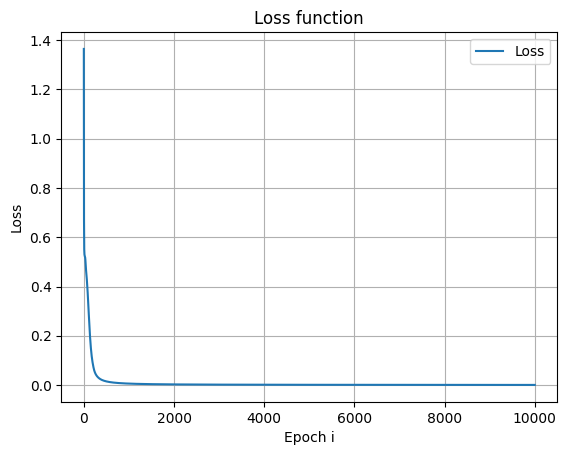

In [27]:
# Overfitting test 
from main import train_nn
from main import sigmoid, sigmoid_derivative
from main import binary_cross_entropy, binary_cross_entropy_derivative, mean_squared_error, mean_squared_error_derivative

X = np.array([[1, 2], [2, 3], [7, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [17, 2]])
y = np.array([1, 1, 0, 1, 1, 1, 1, 1, 0])

print("Number of features in entry data: ", len(X[0]))

# Train the model
epochs, losses = main.train_nn(4, X, y, [2, 2, 2, 1], 0.1, 10000, g=sigmoid, gder=sigmoid_derivative, loss=binary_cross_entropy, lossder=binary_cross_entropy_derivative)

print(losses)
print(epochs)
print(losses[-1])

# Plot the losses
plt.plot(epochs, losses, label="Loss")
plt.xlabel("Epoch i")
plt.ylabel("Loss")
plt.title("Loss function")
plt.legend()
plt.grid()
plt.savefig("./images/loss_multiple_samples.png")
plt.show()

According to the test, the neural network is working correctly for all cases.
Furthermore, the results - the loss values - seem to be excellent, according to the range of values detailed in the documentation provided in the [ReadMe](./README.md#implementing-and-testing). This makes sense since the dataset is simple and the neural network is not very deep.

We are now ready to test the neural network with a more complex dataset.

Let's try with a deliberately distorted dataset. We'll try with something like :

X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])

y = np.array([1, 0, 1, 0])

The X dataset contains some logic in it. The y dataset doesn't make much sense if we look at it. The loss values should be high, and the neural network should not be able to learn the logic in the dataset.

[0.7170833198935277, 0.7148232745320303, 0.7128407903330529, 0.7111001916061722, 0.7095706282933684, 0.7082253712599754, 0.7070412221879502, 0.7059980166633874, 0.7050782037143207, 0.7042664885462371, 0.7035495278718378, 0.7029156692678181, 0.702354727575879, 0.7018577926122205, 0.7014170634416103, 0.7010257052685566, 0.7006777256432493, 0.7003678672065395, 0.7000915146311211, 0.6998446137741239, 0.6996236013541269, 0.6994253437144953, 0.6992470834438822, 0.6990863928008272, 0.698941133038296, 0.6988094188503364, 0.6986895872705103, 0.698580170443426, 0.6984798717690666, 0.6983875449867554, 0.6983021758232192, 0.6982228658787724, 0.6981488184683212, 0.6980793261707031, 0.6980137598716694, 0.6979515591133238, 0.6978922235866373, 0.6978353056242992, 0.6977804035690689, 0.6977271559083468, 0.6976752360791965, 0.6976243478598028, 0.6975742212735879, 0.6975246089411112, 0.6974752828226474, 0.6974260313011063, 0.6973766565608603, 0.6973269722232045, 0.6972768012036703, 0.6972259737603622, 0.

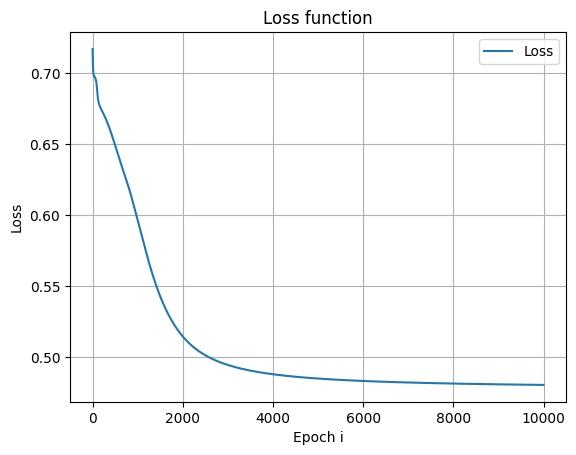

In [29]:
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y = np.array([1, 0, 1, 0])

# Train the model
epochs, losses = main.train_nn(4, X, y, [2, 2, 2, 1], 0.1, 10000, g=sigmoid, gder=sigmoid_derivative, loss=binary_cross_entropy, lossder=binary_cross_entropy_derivative)

print(losses)
print(epochs)
print(losses[-1])

# Plot the losses
plt.plot(epochs, losses, label="Loss")
plt.xlabel("Epoch i")
plt.ylabel("Loss")
plt.title("Loss function")
plt.legend()
plt.grid()
plt.savefig("./images/loss_multiple_samples_outliers.png")
plt.show()

We were right. The loss values are high - close to 0.5, which is, according to our documentation, a poor value - and the neural network is not able to learn the logic in the dataset.

## Problems identified while debugging:

### Problem 1

We identified the problem - the issue is with the update of the bias matrices. The list of biaises is as follows:
[(2, 1), (2, 1), (1, 1)]
Since our neural network is of three layers composed with [2, 1, 1] neurons, we expect to have the following list of biases:
[(2, 1), (1, 1), (1, 1)]

### Problem 2

Obviously b[i+1] = b[i+1] - learning_rate * grad_b[i] doesn't work because the dimensions of the matrices before and after calculation are different.

This makes sense because the dimensions of the matrices are different between the layers. We need to update the bias matrices in a different way.

### Problem 3

The shape of the output matrix is [a, b, c, d] and not [[a], [b], [c], [d]]. y variable should be reshaped to have the correct shape. Done.